## Adding Libraries

In [0]:
!pip install git+https://github.com/AIcrowd/coco.git#subdirectory=PythonAPI
#https://github.com/AIcrowd/food-recognition-challenge-starter-kit/blob/master/Dataset%20Utils.ipynb
#https://github.com/AIcrowd/food-recognition-challenge-starter-kit/blob/master/Local%20Evaluation.ipynb

  Cloning https://github.com/AIcrowd/coco.git to /tmp/pip-req-build-twzify0q
  Running command git clone -q https://github.com/AIcrowd/coco.git /tmp/pip-req-build-twzify0q
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275097 sha256=57071c64f1de5b94d2e431d15a19689d7a0b5cb386634c244f254941da109f44
  Stored in directory: /tmp/pip-ephem-wheel-cache-9t5pygh9/wheels/ab/90/04/967e938726d585d7f0cdf0522611965b7e138f6cd9a6937b35
Successfully built pycocotools


In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from google.colab import drive
import pandas as pd
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools import mask as cocomask
import json
import numpy as np

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading JSONS

In [0]:
ADLFolderLocation = '/content/drive/My Drive/ADLFinalProject/'

with open(ADLFolderLocation + 'annotations_train.json', 'r') as myfile:
    train_json = myfile.read()
    train_json = json.loads(train_json)


with open(ADLFolderLocation + 'annotations_val.json', 'r') as myfile:
    val_json = myfile.read()
    val_json = json.loads(val_json)



## Exploring JSONS

In [0]:
#'/0' + image_id = location of image
# category_id = label
# segementation = various segmenations
# iscrowd - is it a crowd of this food
# area - area of segmentation
# bbox - box surrounding segmentation

train_json['annotations'][1]

{'area': 6813.0,
 'bbox': [83.30840270996094,
  83.30840270996094,
  228.72249999999997,
  237.10500000000002],
 'category_id': 1010,
 'id': 21818,
 'image_id': 16387,
 'iscrowd': 0,
 'segmentation': [[101.27090270996094,
   160.89951766967772,
   83.30840270996094,
   188.44201766967774,
   122.82590270996094,
   212.39201766967776,
   151.56590270996094,
   190.83701766967772,
   151.56590270996094,
   166.88701766967773,
   143.18340270996092,
   157.30701766967775,
   118.03590270996094,
   153.71451766967775],
  [312.0309027099609,
   112.99951766967773,
   230.60090270996093,
   126.17201766967774,
   237.78590270996094,
   169.28201766967774,
   289.2784027099609,
   172.87451766967774,
   308.43840270996094,
   160.89951766967772,
   320.41340270996096,
   136.94951766967773,
   319.2159027099609,
   118.98701766967774,
   309.63590270996093,
   107.01201766967773]]}

In [0]:
train_json['categories']

[{'id': 1565,
  'name': 'bread-wholemeal',
  'name_readable': 'Bread, wholemeal',
  'supercategory': 'food'},
 {'id': 1010,
  'name': 'potatoes-steamed',
  'name_readable': 'Potatoes steamed',
  'supercategory': 'food'},
 {'id': 1085,
  'name': 'broccoli',
  'name_readable': 'Broccoli',
  'supercategory': 'food'},
 {'id': 2053,
  'name': 'butter',
  'name_readable': 'Butter',
  'supercategory': 'food'},
 {'id': 1310,
  'name': 'hard-cheese',
  'name_readable': 'Hard cheese',
  'supercategory': 'food'},
 {'id': 2578,
  'name': 'water',
  'name_readable': 'Water',
  'supercategory': 'food'},
 {'id': 1154,
  'name': 'banana',
  'name_readable': 'Banana',
  'supercategory': 'food'},
 {'id': 2620,
  'name': 'wine-white',
  'name_readable': 'Wine, white',
  'supercategory': 'food'},
 {'id': 1566,
  'name': 'bread-white',
  'name_readable': 'Bread, white',
  'supercategory': 'food'},
 {'id': 1151,
  'name': 'apple',
  'name_readable': 'Apple',
  'supercategory': 'food'},
 {'id': 2939,
  'name

In [0]:
train_json['images']

[{'file_name': '016387.jpg', 'height': 479, 'id': 16387, 'width': 479},
 {'file_name': '049157.jpg', 'height': 478, 'id': 49157, 'width': 478},
 {'file_name': '016394.jpg', 'height': 943, 'id': 16394, 'width': 943},
 {'file_name': '049164.jpg', 'height': 480, 'id': 49164, 'width': 480},
 {'file_name': '049166.jpg', 'height': 480, 'id': 49166, 'width': 480},
 {'file_name': '016398.jpg', 'height': 943, 'id': 16398, 'width': 943},
 {'file_name': '049168.jpg', 'height': 480, 'id': 49168, 'width': 480},
 {'file_name': '049171.jpg', 'height': 478, 'id': 49171, 'width': 478},
 {'file_name': '016409.jpg', 'height': 943, 'id': 16409, 'width': 943},
 {'file_name': '049179.jpg', 'height': 944, 'id': 49179, 'width': 944},
 {'file_name': '032796.jpg', 'height': 480, 'id': 32796, 'width': 480},
 {'file_name': '032797.jpg', 'height': 478, 'id': 32797, 'width': 478},
 {'file_name': '032808.jpg', 'height': 943, 'id': 32808, 'width': 943},
 {'file_name': '016425.jpg', 'height': 784, 'id': 16425, 'width'

## Plotting Data

In [0]:
train_json['annotations'][0]

{'area': 10119.0,
 'bbox': [156.35590270996093,
  156.35590270996093,
  254.82111495971682,
  150.88499999999996],
 'category_id': 1565,
 'id': 21819,
 'image_id': 16387,
 'iscrowd': 0,
 'segmentation': [[254.55090270996092,
   296.2170176696777,
   156.35590270996093,
   347.7095176696778,
   157.55340270996095,
   411.17701766967775,
   197.07090270996093,
   411.17701766967775,
   230.60090270996093,
   387.2270176696777,
   238.98340270996093,
   370.4620176696778,
   237.78590270996094,
   347.7095176696778,
   253.35340270996096,
   364.4745176696777,
   307.2409027099609,
   345.31451766967774,
   291.67340270996095,
   295.0195176696777,
   279.69840270996093,
   286.63701766967773,
   260.53840270996096,
   290.22951766967776]]}

In [0]:
train_json['annotations'][1]

{'area': 6813.0,
 'bbox': [83.30840270996094,
  83.30840270996094,
  228.72249999999997,
  237.10500000000002],
 'category_id': 1010,
 'id': 21818,
 'image_id': 16387,
 'iscrowd': 0,
 'segmentation': [[101.27090270996094,
   160.89951766967772,
   83.30840270996094,
   188.44201766967774,
   122.82590270996094,
   212.39201766967776,
   151.56590270996094,
   190.83701766967772,
   151.56590270996094,
   166.88701766967773,
   143.18340270996092,
   157.30701766967775,
   118.03590270996094,
   153.71451766967775],
  [312.0309027099609,
   112.99951766967773,
   230.60090270996093,
   126.17201766967774,
   237.78590270996094,
   169.28201766967774,
   289.2784027099609,
   172.87451766967774,
   308.43840270996094,
   160.89951766967772,
   320.41340270996096,
   136.94951766967773,
   319.2159027099609,
   118.98701766967774,
   309.63590270996093,
   107.01201766967773]]}

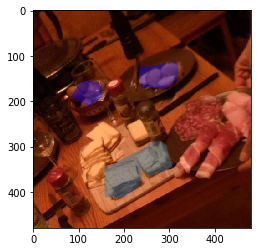

In [0]:
img = mpimg.imread(ADLFolderLocation + 'train/016387.jpg')
imgplot = plt.imshow(img)
plt.fill(train_json['annotations'][0]['segmentation'][0][0::2], train_json['annotations'][0]['segmentation'][0][1::2], alpha = 0.4)

plt.fill(train_json['annotations'][1]['segmentation'][0][0::2], train_json['annotations'][1]['segmentation'][0][1::2],  "b", 
         train_json['annotations'][1]['segmentation'][1][0::2], train_json['annotations'][1]['segmentation'][1][1::2],  "b", alpha = 0.4)

plt.show()
  

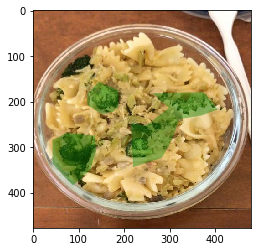

In [0]:
img = mpimg.imread(ADLFolderLocation + 'train/049157.jpg')
imgplot = plt.imshow(img)
plt.fill(train_json['annotations'][2]['segmentation'][0][0::2], train_json['annotations'][2]['segmentation'][0][1::2], "g", 
         train_json['annotations'][2]['segmentation'][1][0::2], train_json['annotations'][2]['segmentation'][1][1::2], "g",
         train_json['annotations'][2]['segmentation'][2][0::2], train_json['annotations'][2]['segmentation'][2][1::2], "g",
         alpha = 0.4)



plt.show()

## Putting Data into TF format

In [0]:
train_json['annotations']

[{'area': 10119.0,
  'bbox': [156.35590270996093,
   156.35590270996093,
   254.82111495971682,
   150.88499999999996],
  'category_id': 1565,
  'id': 21819,
  'image_id': 16387,
  'iscrowd': 0,
  'segmentation': [[254.55090270996092,
    296.2170176696777,
    156.35590270996093,
    347.7095176696778,
    157.55340270996095,
    411.17701766967775,
    197.07090270996093,
    411.17701766967775,
    230.60090270996093,
    387.2270176696777,
    238.98340270996093,
    370.4620176696778,
    237.78590270996094,
    347.7095176696778,
    253.35340270996096,
    364.4745176696777,
    307.2409027099609,
    345.31451766967774,
    291.67340270996095,
    295.0195176696777,
    279.69840270996093,
    286.63701766967773,
    260.53840270996096,
    290.22951766967776]]},
 {'area': 6813.0,
  'bbox': [83.30840270996094,
   83.30840270996094,
   228.72249999999997,
   237.10500000000002],
  'category_id': 1010,
  'id': 21818,
  'image_id': 16387,
  'iscrowd': 0,
  'segmentation': [[101.27

## Trying COCO Function

In [0]:
coco = COCO(ADLFolderLocation + 'annotations_train.json')

loading annotations into memory...
Done (t=0.40s)
creating index...
index created!


In [0]:
coco.loadCats(coco.getCatIds())

[{'id': 1565,
  'name': 'bread-wholemeal',
  'name_readable': 'Bread, wholemeal',
  'supercategory': 'food'},
 {'id': 1010,
  'name': 'potatoes-steamed',
  'name_readable': 'Potatoes steamed',
  'supercategory': 'food'},
 {'id': 1085,
  'name': 'broccoli',
  'name_readable': 'Broccoli',
  'supercategory': 'food'},
 {'id': 2053,
  'name': 'butter',
  'name_readable': 'Butter',
  'supercategory': 'food'},
 {'id': 1310,
  'name': 'hard-cheese',
  'name_readable': 'Hard cheese',
  'supercategory': 'food'},
 {'id': 2578,
  'name': 'water',
  'name_readable': 'Water',
  'supercategory': 'food'},
 {'id': 1154,
  'name': 'banana',
  'name_readable': 'Banana',
  'supercategory': 'food'},
 {'id': 2620,
  'name': 'wine-white',
  'name_readable': 'Wine, white',
  'supercategory': 'food'},
 {'id': 1566,
  'name': 'bread-white',
  'name_readable': 'Bread, white',
  'supercategory': 'food'},
 {'id': 1151,
  'name': 'apple',
  'name_readable': 'Apple',
  'supercategory': 'food'},
 {'id': 2939,
  'name

In [0]:
coco.imgs

{16387: {'file_name': '016387.jpg', 'height': 479, 'id': 16387, 'width': 479},
 49157: {'file_name': '049157.jpg', 'height': 478, 'id': 49157, 'width': 478},
 16394: {'file_name': '016394.jpg', 'height': 943, 'id': 16394, 'width': 943},
 49164: {'file_name': '049164.jpg', 'height': 480, 'id': 49164, 'width': 480},
 49166: {'file_name': '049166.jpg', 'height': 480, 'id': 49166, 'width': 480},
 16398: {'file_name': '016398.jpg', 'height': 943, 'id': 16398, 'width': 943},
 49168: {'file_name': '049168.jpg', 'height': 480, 'id': 49168, 'width': 480},
 49171: {'file_name': '049171.jpg', 'height': 478, 'id': 49171, 'width': 478},
 16409: {'file_name': '016409.jpg', 'height': 943, 'id': 16409, 'width': 943},
 49179: {'file_name': '049179.jpg', 'height': 944, 'id': 49179, 'width': 944},
 32796: {'file_name': '032796.jpg', 'height': 480, 'id': 32796, 'width': 480},
 32797: {'file_name': '032797.jpg', 'height': 478, 'id': 32797, 'width': 478},
 32808: {'file_name': '032808.jpg', 'height': 943, '

In [0]:
for image in coco.getImgIds():

  anns_ids = coco.getAnnIds(imgIds= image)
  anns = coco.loadAnns(anns_ids)
  anns_img = np.zeros((coco.imgs[image]['height'] ,
                     coco.imgs[image]['width']))
  for ann in anns:
      anns_img = np.maximum(anns_img,coco.annToMask(ann)*ann['category_id'])

  

## Creating Data

In [0]:
dataset = dataset.map(lambda x, y, z: tf.numpy_function(
      load_np, [x, y, z], [tf.float32, tf.int32, tf.double, tf.string]),
      num_parallel_calls=tf.data.experimental.AUTOTUNE)


tf.io.read_file([x.get('file_name') for x in data['images']])

['016387.jpg',
 '049157.jpg',
 '016394.jpg',
 '049164.jpg',
 '049166.jpg',
 '016398.jpg',
 '049168.jpg',
 '049171.jpg',
 '016409.jpg',
 '049179.jpg',
 '032796.jpg',
 '032797.jpg',
 '032808.jpg',
 '016425.jpg',
 '049197.jpg',
 '049198.jpg',
 '016430.jpg',
 '016433.jpg',
 '049201.jpg',
 '049211.jpg',
 '016444.jpg',
 '049226.jpg',
 '032845.jpg',
 '049232.jpg',
 '049237.jpg',
 '016473.jpg',
 '032860.jpg',
 '032865.jpg',
 '016483.jpg',
 '049253.jpg',
 '049257.jpg',
 '049260.jpg',
 '049261.jpg',
 '016494.jpg',
 '016498.jpg',
 '049268.jpg',
 '049269.jpg',
 '016499.jpg',
 '032887.jpg',
 '032884.jpg',
 '032889.jpg',
 '032891.jpg',
 '049277.jpg',
 '032896.jpg',
 '016512.jpg',
 '032899.jpg',
 '016516.jpg',
 '049287.jpg',
 '016532.jpg',
 '016536.jpg',
 '049305.jpg',
 '016538.jpg',
 '032924.jpg',
 '016544.jpg',
 '016545.jpg',
 '032931.jpg',
 '032947.jpg',
 '049344.jpg',
 '032965.jpg',
 '016581.jpg',
 '049356.jpg',
 '032973.jpg',
 '032978.jpg',
 '016595.jpg',
 '032982.jpg',
 '049369.jpg',
 '016604.j

In [0]:
#https://www.tensorflow.org/tutorials/images/segmentation

from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

dataset, info = tfds.load('oxford_iiit_pet:3.0.0', with_info=True)


Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.0.0.incompleteRGTJLC/oxford_iiit_pet-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.0.0.incompleteRGTJLC/oxford_iiit_pet-test.tfrecord
Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.0.0. Subsequent calls will reuse this data.


In [0]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

def load_image_test(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask


@tf.function
def load_image_train(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 32
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [0]:
type(dataset['train'])


tensorflow.python.data.ops.dataset_ops._OptionsDataset

In [0]:
dataset['train']

<_OptionsDataset shapes: {file_name: (), image: (None, None, 3), label: (), segmentation_mask: (None, None, 1)}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64, segmentation_mask: tf.uint8}>

In [0]:
train = 